In [1]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv("/Churn_Modelling.csv")

In [5]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.drop(columns = ['RowNumber','CustomerId','Surname',],inplace = True)

In [8]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [10]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [13]:
# in case Geography and Gender has character data let transform it 

In [14]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [15]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [16]:
# Perform the standard Scaling
# before the standard Scaling let train and test data

In [18]:
X = df.drop(columns = ['Exited'])
y = df['Exited'].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=0)

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)

In [26]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential    # we work on the sequential data
from tensorflow.keras.layers import Dense

In [27]:
model = Sequential()   # model work on the sequential data

# now create the arcitecture 

model.add(Dense(11,activation = 'sigmoid',input_dim = 11))   
# it mean 11 perceptron in the hidden layer and use sigmoid function --> 0-1 percentage form and input dimension = 11
model.add(Dense(11,activation = 'sigmoid'))   # new 11 perceptron layer with sigmoid
model.add(Dense(1, activation = 'sigmoid'))  # for the outpur data

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                132       
                                                                 
 dense_1 (Dense)             (None, 11)                132       
                                                                 
 dense_2 (Dense)             (None, 1)                 12        
                                                                 
Total params: 276
Trainable params: 276
Non-trainable params: 0
_________________________________________________________________


In [29]:
# model compile ---> give info like 1) loss funciton and (2) optimizer 

In [31]:
model.compile(optimizer='Adam',loss = 'binary_crossentropy', metrics = ['accuracy'])  
# binary_crossentropy is the "log-loss" 

In [39]:
history = model.fit(X_train,y_train,batch_size=50,epochs = 100,verbose = 1,validation_split=0.2)

Epoch 1/100
128/128 [==============================] - 0s 3ms/step - loss: 0.4989 - accuracy: 0.7958 - val_loss: 0.4948 - val_accuracy: 0.7969
Epoch 2/100
128/128 [==============================] - 0s 2ms/step - loss: 0.4988 - accuracy: 0.7958 - val_loss: 0.4955 - val_accuracy: 0.7969
Epoch 3/100
128/128 [==============================] - 0s 2ms/step - loss: 0.4990 - accuracy: 0.7958 - val_loss: 0.4948 - val_accuracy: 0.7969
Epoch 4/100
128/128 [==============================] - 0s 2ms/step - loss: 0.4988 - accuracy: 0.7958 - val_loss: 0.4950 - val_accuracy: 0.7969
Epoch 5/100
128/128 [==============================] - 0s 2ms/step - loss: 0.4992 - accuracy: 0.7958 - val_loss: 0.4948 - val_accuracy: 0.7969
Epoch 6/100
128/128 [==============================] - 0s 2ms/step - loss: 0.4989 - accuracy: 0.7958 - val_loss: 0.4948 - val_accuracy: 0.7969
Epoch 7/100
128/128 [==============================] - 0s 2ms/step - loss: 0.4992 - accuracy: 0.7958 - val_loss: 0.4949 - val_accuracy: 0.7969

In [40]:
# to predict the accuracy 
y_pred = model.predict(X_test)

63/63 [==============================] - 0s 1ms/step


In [41]:
y_pred

array([[0.24197106],
       [0.24197106],
       [0.24197106],
       ...,
       [0.24197106],
       [0.24197106],
       [0.24197106]], dtype=float32)

In [42]:
y_pred = y_pred.argmax(axis = -1)   # some sort of change in teh form of 0 and 1 

In [43]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7975

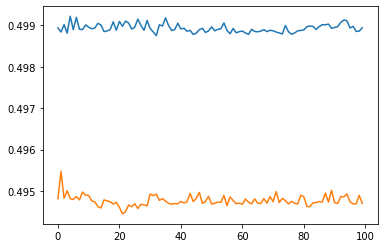

In [44]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

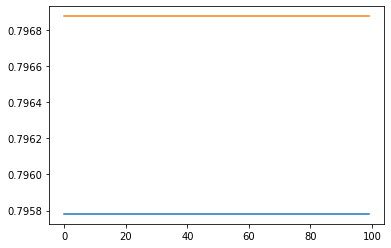

In [46]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])